# Take - Home Quiz 

#### Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

#### Adjust plotting settings for better visualization.

In [36]:
plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
data = pd.read_csv("housing_sampled.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7234600098,20140905T000000,552100.0,3,3.0,1330,1379,2.0,0,0,...,8,1120,210,2005,0,98122,47.6126,-122.313,1810,1770
1,4221250340,20150409T000000,625000.0,3,2.5,2280,4757,2.0,0,0,...,8,2280,0,2003,0,98075,47.5901,-122.018,2280,4534
2,546000820,20141110T000000,415000.0,2,1.0,980,4108,1.0,0,0,...,7,980,0,1947,0,98117,47.6870,-122.381,1500,4046
3,8682250330,20140624T000000,675000.0,3,3.5,2300,5611,1.0,0,0,...,8,2300,0,2004,0,98053,47.7122,-122.026,2170,5926
4,7579200600,20150428T000000,575000.0,3,2.0,1750,5750,1.0,0,2,...,7,870,880,1956,0,98116,47.5579,-122.384,1750,5750


#### Select Proposed Variables in the Instructions

In [4]:
df = data[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view']]
df.head(20)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view
0,552100.0,3,3.00,1330,2.0,0,0
1,625000.0,3,2.50,2280,2.0,0,0
2,415000.0,2,1.00,980,1.0,0,0
3,675000.0,3,3.50,2300,1.0,0,0
4,575000.0,3,2.00,1750,1.0,0,2
5,327500.0,3,2.25,1770,1.0,0,0
6,140000.0,3,1.00,1000,1.0,0,0
7,322000.0,3,1.00,1230,1.0,0,0
8,356000.0,2,1.00,1430,1.0,0,0
9,260000.0,2,1.00,1410,1.5,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        3000 non-null   float64
 1   bedrooms     3000 non-null   int64  
 2   bathrooms    3000 non-null   float64
 3   sqft_living  3000 non-null   int64  
 4   floors       3000 non-null   float64
 5   waterfront   3000 non-null   int64  
 6   view         3000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 164.2 KB


#### Create a scatterplot matrix to get general knowledge about variables.

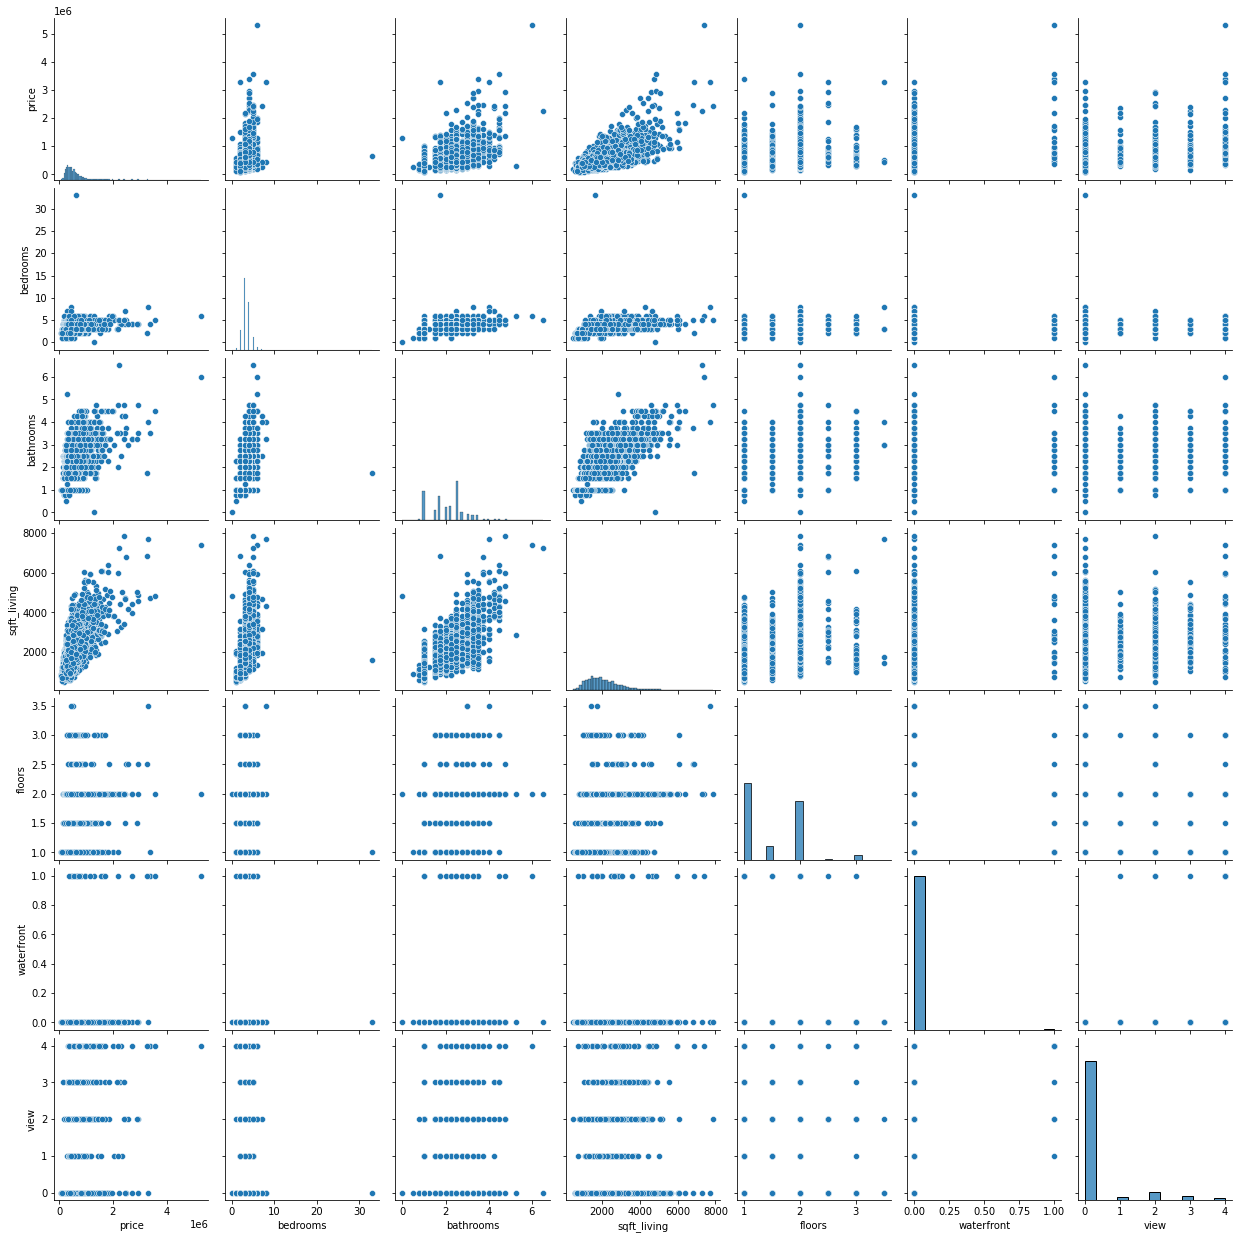

In [6]:
sns.pairplot(df)
plt.show()

#### It seems that we do not have normally distributed variables, but we do not rely on normality in ANN. However, there seems some variables are correlated.

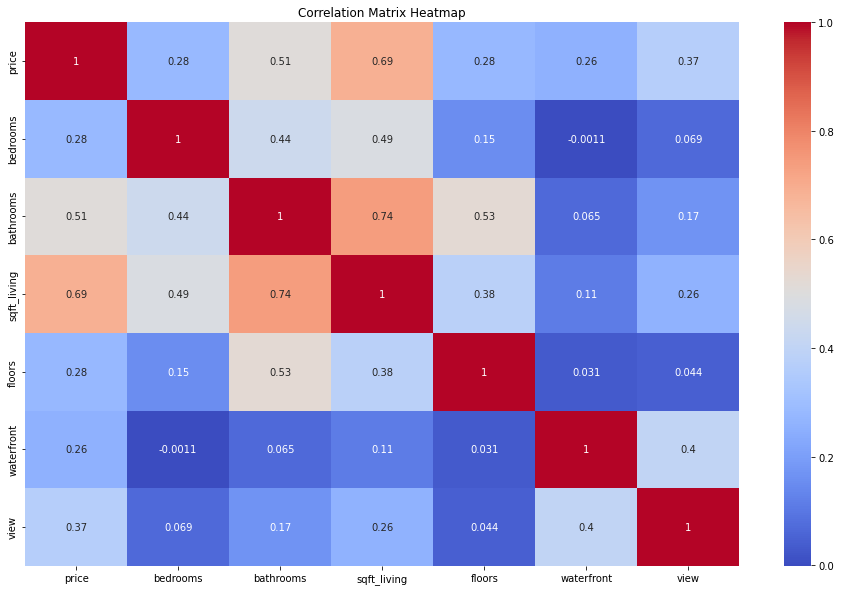

In [37]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

#### From correlation heatmap, we can also observe some slightly and highly correlated variables.

#### Now, one should apply min-max scaling before proceeding further. For this purpose, a function will be created.

In [8]:
def scaling_min_max(x): # Function for scaling
    return (x - x.min()) / (x.max() - x.min())

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.357971e+05,3.387667,2.110083,2084.095333,1.497667,0.008000,0.239333
std,3.468307e+05,1.050277,0.763553,916.472026,0.545522,0.089099,0.766104
min,7.800000e+04,0.000000,0.000000,470.000000,1.000000,0.000000,0.000000
25%,3.230000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,0.000000
50%,4.510000e+05,3.000000,2.250000,1920.000000,1.500000,0.000000,0.000000
75%,6.500000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000
max,5.300000e+06,33.000000,6.500000,7880.000000,3.500000,1.000000,4.000000


#### Waterfront and view are categorical variables in here. So, using one-hot encoding might be beneficial. Just view is needed to be encoded, since waterfront is already in binary form.

In [10]:
df_encoded = pd.get_dummies(df, columns=['view'], drop_first=True, dtype = 'int')

In [11]:
df_encoded.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view_1,view_2,view_3,view_4
0,552100.0,3,3.00,1330,2.0,0,0,0,0,0
1,625000.0,3,2.50,2280,2.0,0,0,0,0,0
2,415000.0,2,1.00,980,1.0,0,0,0,0,0
3,675000.0,3,3.50,2300,1.0,0,0,0,0,0
4,575000.0,3,2.00,1750,1.0,0,0,1,0,0
5,327500.0,3,2.25,1770,1.0,0,0,0,0,0
6,140000.0,3,1.00,1000,1.0,0,0,0,0,0
7,322000.0,3,1.00,1230,1.0,0,0,0,0,0
8,356000.0,2,1.00,1430,1.0,0,0,0,0,0
9,260000.0,2,1.00,1410,1.5,0,0,0,0,0


In [12]:
df_encoded[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors']] = df_encoded[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors']].apply(scaling_min_max) 
df_scaled = df_encoded.copy()

In [13]:
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view_1,view_2,view_3,view_4
0,0.090789,0.090909,0.461538,0.116059,0.4,0,0,0,0,0
1,0.104749,0.090909,0.384615,0.244265,0.4,0,0,0,0,0
2,0.064535,0.060606,0.153846,0.068826,0.0,0,0,0,0,0
3,0.114324,0.090909,0.538462,0.246964,0.0,0,0,0,0,0
4,0.095174,0.090909,0.307692,0.172740,0.0,0,0,1,0,0


In [14]:
df_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view_1,view_2,view_3,view_4
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.087667,0.102657,0.324628,0.217827,0.199067,0.008000,0.018000,0.048333,0.022000,0.014667
std,0.066417,0.031827,0.117470,0.123680,0.218209,0.089099,0.132973,0.214505,0.146708,0.120235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.046917,0.090909,0.269231,0.129555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.071429,0.090909,0.346154,0.195682,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.109537,0.121212,0.384615,0.280702,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All numerical variables take places between 0 and 1.

#### Apply cross validation by using train-test split approach.

In [15]:
# For reproducability
np.random.seed(2001)

# Splitting the data
train_data, test_data = train_test_split(df_scaled, test_size=0.25, random_state=2001)
X_train = train_data.drop(columns="price")
y_train = train_data["price"]
X_test = test_data.drop(columns="price")
y_test = test_data["price"]


#### Before training, get initial weights for comparison after training.

In [16]:
model_inspect = Sequential() 
model_inspect.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

model_inspect.compile(optimizer=Adam(), loss='mse') 

initial_weights = model_inspect.get_weights()

print("Initial Weights and Biases:")
for i, w in enumerate(initial_weights):
    print(f"Layer {i}: {w}")

Initial Weights and Biases:
Layer 0: [[-0.29032952]
 [-0.40382558]
 [ 0.71975386]
 [-0.7403038 ]
 [-0.75347614]
 [ 0.75623655]
 [-0.2954994 ]
 [-0.29480502]
 [ 0.37841642]]
Layer 1: [0.]


### Model 1 : A simple ANN

In [17]:
model1 = Sequential()
model1.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

model1.compile(optimizer=Adam(), loss='mse')
model1.fit(X_train, y_train, epochs=300, verbose=0)

#### Predictions, SSE, RMSE and Hyperparameter for Initial Model (Model 1)

In [18]:
pred_train1 = model1.predict(X_train).flatten()
pred_test1 = model1.predict(X_test).flatten()

SSE_1_train = np.sum((y_train - pred_train1) ** 2) / 2
SSE_1_test = np.sum((y_test - pred_test1) ** 2) / 2

print("Model 1 - Train SSE:", SSE_1_train / len(y_train))
print("Model 1 - Test SSE:", SSE_1_test / len(y_test))

rmse_train = np.sqrt(mean_squared_error(y_train, pred_train1))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test1))

print("Model 1 - Train RMSE:", rmse_train)
print("Model 1 - Test RMSE:", rmse_test)

optimizer = model1.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

24/24 [==============================] - 0s 607us/step
Model 1 - Train SSE: 0.0010680776493464626
Model 1 - Test SSE: 0.0009970309299250865
Model 1 - Train RMSE: 0.04621856011055434
Model 1 - Test RMSE: 0.044654919772071845
Optimizer: Adam
Learning Rate: 0.001


#### As one may observe, averages are close to each other for both metrics. Morever, Test SSE-RMSE are slightly lower than Train SSE-RMSE; hence, one may conclude that one overfitting exists. 

### Model 2 = ANN Model with 3 hidden layers

In [19]:
model2 = Sequential()
model2.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model2.fit(X_train, y_train, epochs=300, verbose=0)

#### Predictions, SSE, RMSE and Hyperparameter for Model 2

In [20]:
pred_train2 = model2.predict(X_train).flatten()
pred_test2 = model2.predict(X_test).flatten()

SSE_2_train = np.sum((y_train - pred_train2) ** 2) / 2
SSE_2_test = np.sum((y_test - pred_test2) ** 2) / 2

print("Model 2 - Train SSE:", SSE_2_train / len(y_train))
print("Model 2 - Test SSE:", SSE_2_test / len(y_test))

rmse2_train = np.sqrt(mean_squared_error(y_train, pred_train2))
rmse2_test = np.sqrt(mean_squared_error(y_test, pred_test2))

print("Model 1 - Train RMSE:", rmse2_train)
print("Model 1 - Test RMSE:", rmse2_test)

optimizer = model2.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

24/24 [==============================] - 0s 650us/step
Model 2 - Train SSE: 0.0011532651641134681
Model 2 - Test SSE: 0.001141067412734554
Model 1 - Train RMSE: 0.04802635035297744
Model 1 - Test RMSE: 0.04777169481470286
Optimizer: Adam
Learning Rate: 0.01


### Model 3: ANN with 5-5 neurons in 2 layers

In [21]:
model3 = Sequential()
model3.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(5, activation='relu'))
model3.add(Dense(1, activation='linear'))

model3.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
%time model3.fit(X_train, y_train, epochs=300, verbose=0)

CPU times: total: 21.9 s
Wall time: 15.6 s


#### Predictions, SSE, RMSE and Hyperparameter for Model 3

In [22]:
pred_train3 = model3.predict(X_train).flatten()
pred_test3 = model3.predict(X_test).flatten()

SSE_3_train = np.sum((y_train - pred_train3) ** 2) / 2
SSE_3_test = np.sum((y_test - pred_test3) ** 2) / 2

print("Model 3 - Train SSE:", SSE_3_train / len(y_train))
print("Model 3 - Test SSE:", SSE_3_test / len(y_test))

rmse3_train = np.sqrt(mean_squared_error(y_train, pred_train3))
rmse3_test = np.sqrt(mean_squared_error(y_test, pred_test3))

print("Model 3 - Train RMSE:", rmse3_train)
print("Model 3 - Test RMSE:", rmse3_test)

optimizer = model3.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

24/24 [==============================] - 0s 654us/step
Model 3 - Train SSE: 0.0009152948100932122
Model 3 - Test SSE: 0.000994311340940163
Model 3 - Train RMSE: 0.04278539026567859
Model 3 - Test RMSE: 0.04459397584742053
Optimizer: Adam
Learning Rate: 0.01


### Model 4 : 5–3 layout with 2 hidden layers

In [23]:
model4 = Sequential()
model4.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model4.add(Dense(3, activation='relu'))
model4.add(Dense(1, activation='linear'))

model4.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
%time model4.fit(X_train, y_train, epochs=300, verbose=0)

CPU times: total: 22.7 s
Wall time: 16.4 s


#### Predictions, SSE, RMSE and Hyperparameter for Model 4

In [24]:
pred_train4 = model4.predict(X_train).flatten()
pred_test4 = model4.predict(X_test).flatten()

SSE_4_train = np.sum((y_train - pred_train3) ** 2) / 2
SSE_4_test = np.sum((y_test - pred_test3) ** 2) / 2

print("Model 4 - Train SSE:", SSE_4_train / len(y_train))
print("Model 4 - Test SSE:", SSE_4_test / len(y_test))

rmse4_train = np.sqrt(mean_squared_error(y_train, pred_train4))
rmse4_test = np.sqrt(mean_squared_error(y_test, pred_test4))

print("Model 4 - Train RMSE:", rmse4_train)
print("Model 4 - Test RMSE:", rmse4_test)

optimizer = model4.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

24/24 [==============================] - 0s 737us/step
Model 4 - Train SSE: 0.0009152948100932122
Model 4 - Test SSE: 0.000994311340940163
Model 4 - Train RMSE: 0.0439488561338636
Model 4 - Test RMSE: 0.04455942248149978
Optimizer: Adam
Learning Rate: 0.01


### Model 5 : 2 hidden layers of 5-3 layout with adjusted learning rate, epoch and batch size

In [25]:
model5 = Sequential()
model5.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model5.add(Dense(3, activation='relu'))
model5.add(Dense(1, activation='linear'))

model5.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

%time model4.fit(X_train, y_train, epochs=500, batch_size=128,verbose=0)

CPU times: total: 13.1 s
Wall time: 8.68 s


#### Predictions, SSE, RMSE and Hyperparameter for Model 5

In [26]:
pred_train5 = model5.predict(X_train).flatten()
pred_test5 = model5.predict(X_test).flatten()

SSE_5_train = np.sum((y_train - pred_train5) ** 2) / 2
SSE_5_test = np.sum((y_test - pred_test5) ** 2) / 2

print("Model 5 - Train SSE:", SSE_5_train / len(y_train))
print("Model 5 - Test SSE:", SSE_5_test / len(y_test))

rmse5_train = np.sqrt(mean_squared_error(y_train, pred_train5))
rmse5_test = np.sqrt(mean_squared_error(y_test, pred_test5))

print("Model 5 - Train RMSE:", rmse5_train)
print("Model 5 - Test RMSE:", rmse5_test)

optimizer = model5.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

24/24 [==============================] - 0s 737us/step
Model 5 - Train SSE: 0.005350923712027867
Model 5 - Test SSE: 0.004845038945372462
Model 5 - Train RMSE: 0.10344973380369682
Model 5 - Test RMSE: 0.09843819325213626
Optimizer: Adam
Learning Rate: 0.001


### Model 6 : ANN of 8-4 layout with 2 layers, hyperbolic tangent activation and glorot uniform initializer

In [27]:
model_tanh = Sequential()
model_tanh.add(Dense(8, 
                     input_dim=X_train.shape[1], 
                     activation='tanh', 
                     kernel_initializer='glorot_uniform'))
model_tanh.add(Dense(4, 
                     activation='tanh', 
                     kernel_initializer='glorot_uniform'))
model_tanh.add(Dense(1, 
                     activation='linear'))

model_tanh.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='mse', 
                   metrics=['RootMeanSquaredError'])

%time model_tanh.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

CPU times: total: 22.7 s
Wall time: 15.9 s


#### Predictions, SSE, RMSE and Hyperparameter for Model 6

In [28]:
pred_train6 = model_tanh.predict(X_train).flatten()
pred_test6 = model_tanh.predict(X_test).flatten()

SSE_6_train = np.sum((y_train - pred_train6) ** 2) / 2
SSE_6_test = np.sum((y_test - pred_test6) ** 2) / 2

print("Model 6 - Train SSE:", SSE_6_train / len(y_train))
print("Model 6 - Test SSE:", SSE_6_test / len(y_test))

rmse6_train = np.sqrt(mean_squared_error(y_train, pred_train6))
rmse6_test = np.sqrt(mean_squared_error(y_test, pred_test6))

print("Model 6 - Train RMSE:", rmse6_train)
print("Model 6 - Test RMSE:", rmse6_test)

optimizer = model_tanh.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())


24/24 [==============================] - 0s 607us/step
Model 6 - Train SSE: 0.0009531964388721017
Model 6 - Test SSE: 0.0009477637232699627
Model 6 - Train RMSE: 0.043662259191940625
Model 6 - Test RMSE: 0.0435376555011857
Optimizer: Adam
Learning Rate: 0.001


### Model 7 : ANN of 8-5-3 layout with 3 layers and hyperbolic tangent activation

In [29]:
model7 = Sequential()
model7.add(Dense(8, input_dim=X_train.shape[1], activation='tanh'))
model7.add(Dense(5, activation='tanh'))
model7.add(Dense(3, activation='tanh'))
model7.add(Dense(1, activation='linear'))

model7.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

%time model7.fit(X_train, y_train, epochs=500, batch_size=128, verbose=0)

CPU times: total: 11.2 s
Wall time: 6.86 s


#### Predictions, SSE, RMSE and Hyperparameter for Model 7

In [30]:
pred_train7 = model7.predict(X_train).flatten()
pred_test7 = model7.predict(X_test).flatten()

SSE_7_train = np.sum((y_train - pred_train7) ** 2) / 2
SSE_7_test = np.sum((y_test - pred_test7) ** 2) / 2

print("Model 7 - Train SSE:", SSE_7_train / len(y_train))
print("Model 7 - Test SSE:", SSE_7_test / len(y_test))

rmse7_train = np.sqrt(mean_squared_error(y_train, pred_train7))
rmse7_test = np.sqrt(mean_squared_error(y_test, pred_test7))

print("Model 7 - Train RMSE:", rmse7_train)
print("Model 7 - Test RMSE:", rmse7_test)

optimizer = model7.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

24/24 [==============================] - 0s 693us/step
Model 7 - Train SSE: 0.0009380294831352115
Model 7 - Test SSE: 0.0009182881315809946
Model 7 - Train RMSE: 0.043313496352412176
Model 7 - Test RMSE: 0.04285529445893459
Optimizer: Adam
Learning Rate: 0.001


### Model 8 : ANN of 16-8-4 layout with 3 layers, swish activation and adjusted epoch, bath size and learning rate

In [31]:
model8 = Sequential()
model8.add(Dense(16, input_dim=X_train.shape[1], activation='swish'))
model8.add(Dense(8, activation='swish'))
model8.add(Dense(4, activation='swish'))
model8.add(Dense(1, activation='linear'))

model8.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss='mse'
)

%time model8.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=0)

CPU times: total: 40.5 s
Wall time: 26.5 s


#### Predictions, SSE, RMSE and Hyperparameter for Model 8

In [32]:
pred_train8 = model8.predict(X_train).flatten()
pred_test8 = model8.predict(X_test).flatten()

SSE_8_train = np.sum((y_train - pred_train8) ** 2) / 2
SSE_8_test = np.sum((y_test - pred_test8) ** 2) / 2

print("Model 8 - Train SSE:", SSE_8_train / len(y_train))
print("Model 8 - Test SSE:", SSE_8_test / len(y_test))

rmse8_train = np.sqrt(mean_squared_error(y_train, pred_train8))
rmse8_test = np.sqrt(mean_squared_error(y_test, pred_test8))

print("Model 8 - Train RMSE:", rmse8_train)
print("Model 8 - Test RMSE:", rmse8_test)

optimizer = model8.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

24/24 [==============================] - 0s 651us/step
Model 8 - Train SSE: 0.0009047245401035392
Model 8 - Test SSE: 0.0009383712444019873
Model 8 - Train RMSE: 0.04253761958792568
Model 8 - Test RMSE: 0.04332138604435429
Optimizer: Adam
Learning Rate: 0.0005


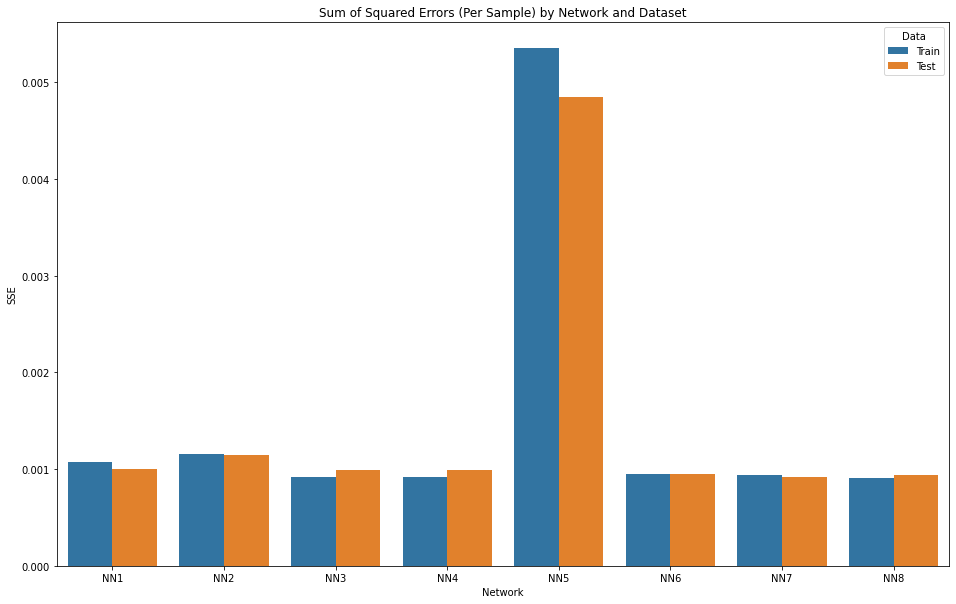

In [38]:
Regression_NN_Errors = pd.DataFrame({
    "Network": ["NN1", "NN1", "NN2", "NN2", "NN3", "NN3", "NN4", "NN4",
                "NN5", "NN5", "NN6", "NN6", "NN7", "NN7", "NN8", "NN8"],
    "Data": ["Train", "Test"] * 8,
    "SSE": [
        SSE_1_train / len(y_train), SSE_1_test / len(y_test),
        SSE_2_train / len(y_train), SSE_2_test / len(y_test),
        SSE_3_train / len(y_train), SSE_3_test / len(y_test),
        SSE_4_train / len(y_train), SSE_4_test / len(y_test),
        SSE_5_train / len(y_train), SSE_5_test / len(y_test),
        SSE_6_train / len(y_train), SSE_6_test / len(y_test),
        SSE_7_train / len(y_train), SSE_7_test / len(y_test),
        SSE_8_train / len(y_train), SSE_8_test / len(y_test)
    ]
})

sns.barplot(data=Regression_NN_Errors, x="Network", y="SSE", hue="Data")
plt.title("Sum of Squared Errors (Per Sample) by Network and Dataset")
plt.show()

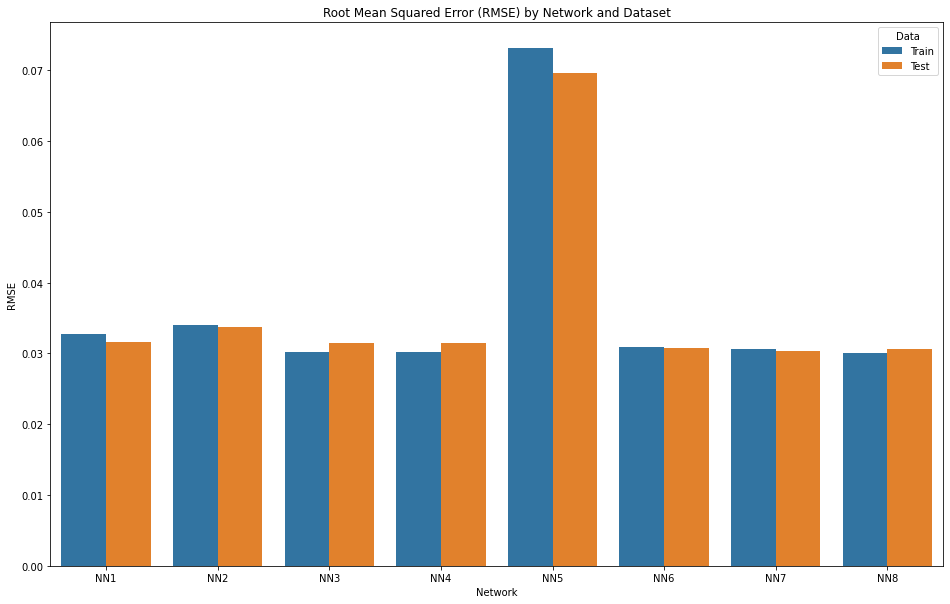

In [39]:
Regression_NN_Errors_RMSE = pd.DataFrame({
    "Network": ["NN1", "NN1", "NN2", "NN2", "NN3", "NN3", "NN4", "NN4",
                "NN5", "NN5", "NN6", "NN6", "NN7", "NN7", "NN8", "NN8"],
    "Data": ["Train", "Test"] * 8,
    "RMSE": [
        np.sqrt(SSE_1_train / len(y_train)), np.sqrt(SSE_1_test / len(y_test)),
        np.sqrt(SSE_2_train / len(y_train)), np.sqrt(SSE_2_test / len(y_test)),
        np.sqrt(SSE_3_train / len(y_train)), np.sqrt(SSE_3_test / len(y_test)),
        np.sqrt(SSE_4_train / len(y_train)), np.sqrt(SSE_4_test / len(y_test)),
        np.sqrt(SSE_5_train / len(y_train)), np.sqrt(SSE_5_test / len(y_test)),
        np.sqrt(SSE_6_train / len(y_train)), np.sqrt(SSE_6_test / len(y_test)),
        np.sqrt(SSE_7_train / len(y_train)), np.sqrt(SSE_7_test / len(y_test)),
        np.sqrt(SSE_8_train / len(y_train)), np.sqrt(SSE_8_test / len(y_test))
    ]
})

sns.barplot(data=Regression_NN_Errors_RMSE, x="Network", y="RMSE", hue="Data")
plt.title("Root Mean Squared Error (RMSE) by Network and Dataset")
plt.show()

## It is clear that fifth model is a washout. For model 3, model 4 and model 8, training errors are slightly lower than test errors. Since difference between training and test errors are not noticeably high, one may conclude that overfitting is not a problem for this case.

In [35]:
df_rmse = Regression_NN_Errors_RMSE.pivot(index="Network", columns="Data", values="RMSE")
df_sse  = Regression_NN_Errors.pivot(index="Network", columns="Data", values="SSE")

df_rmse.columns = ['RMSE_Train', 'RMSE_Test']
df_sse.columns  = ['SSE_Train',  'SSE_Test']

comparison_df = pd.concat([df_sse, df_rmse], axis=1)

comparison_df = comparison_df.sort_values(by='RMSE_Test')

comparison_df

,SSE_Train,SSE_Test,RMSE_Train,RMSE_Test
Network,,,,
NN8,0.000938,0.000905,0.030633,0.030079
NN3,0.000994,0.000915,0.031533,0.030254
NN4,0.000994,0.000915,0.031533,0.030254
NN7,0.000918,0.000938,0.030303,0.030627
NN6,0.000948,0.000953,0.030786,0.030874
NN1,0.000997,0.001068,0.031576,0.032681
NN2,0.001141,0.001153,0.033780,0.033960
NN5,0.004845,0.005351,0.069606,0.073150


## According to the plots above and error table, 8th model can be choosen as best model because it achieved lowest test SSE and RMSE. However, error results are close to each other with other models except 5th one. Then, if one prefers a simple architecture design, 3rd and 4th models also may be useful.